<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 5
### Applied Machine Learning

__(a.) [50 pts] Preprocess the data, impute missing values as you see fit, and remove features
that you see useless.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("datasets/titanic_train.csv")

## see data types
print(train.dtypes)

## check for missing data
train.isnull().sum()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
from sklearn.tree import export_graphviz

In [3]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [6]:
## remove unecessary columns that don't add information for learning and the target 'Survived'
X = train.loc[:, ~train.columns.isin(["PassengerId",
                                       "Survived",
                                       "Name",
                                       "Ticket"])]
## set target
y = train.loc[:, train.columns == "Survived"]

## check for missing data
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


C:\Users\bjwil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


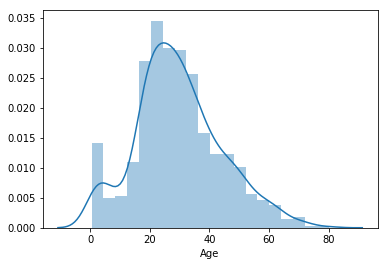

In [7]:
## look at age and see the data
print(X.Age.unique())

## get a hist of the data
sns.distplot(X.Age)

Looks pretty distributed so we can input missing `Age` values with the mean age.

In [8]:
## fill NaN with mean
X.Age = X.Age.fillna(X.Age.mean())   

## check unique values for other two columns with NaN
print(X.Embarked.unique())
print(X.Cabin.unique())

## too many unique Cabins so print sorted to see range
print(X.Cabin[X.Cabin.notnull()].sort_values().unique)

['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
<bound method Series.uniq

C:\Users\bjwil\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
## what are the counts of the `Embarked` column
X.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

OK so now I remember how the data looked for Cabin last time I saw this dataset.  So there are Decks A-G in which A is closest to the top and G towards the bottom as in the picture below.  There is also a 'T' deck that is not in the picture.  From this website below I discovered this was the boat deck:

https://www.encyclopedia-titanica.org/cabins.html



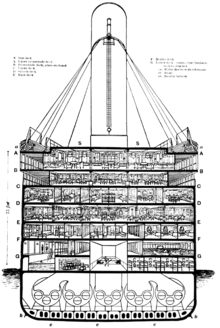

So because the T Deck is the boat deck I will map that to 1, A-G will map to 2-8, and the NaN values to 0.  Then I will test my predictions of the validation set removing this column.  As for the E `Embarked` column, this is only missing two values so we will input with the mode.

In [10]:
X.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
## fill with mode
X.Embarked = X.Embarked.fillna(X.Embarked.mode()[0])

## sanity check
print(X.Embarked.value_counts()['S'] == 646)
X.isnull().sum()

True


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [12]:
## now we will slice the first string for the Cabin to get deck and map them to numbers
X = X.assign(Cabin_new=X['Cabin'].str[:1])

X['Cabin_new_'] = X['Cabin_new'].map({'T' : 1, 
                                      'A' : 2, 
                                      'B' : 3, 
                                      'C' : 4, 
                                      'D' : 5, 
                                      'E' : 6, 
                                      'F' : 7, 
                                      'G' : 8, 
                                      None : 0})

## sanity check that we have same amount of 0 for Cabin_new_ as NaN for Cabin
X['Cabin_new_'].value_counts()[0] == sum(X['Cabin'].isnull())

True

In [13]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_new,Cabin_new_
0,3,male,22.000000,1,0,7.2500,NaN,S,NaN,0
1,1,female,38.000000,1,0,71.2833,C85,C,C,4
2,3,female,26.000000,0,0,7.9250,NaN,S,NaN,0
3,1,female,35.000000,1,0,53.1000,C123,S,C,4
4,3,male,35.000000,0,0,8.0500,NaN,S,NaN,0
5,3,male,29.699118,0,0,8.4583,NaN,Q,NaN,0
6,1,male,54.000000,0,0,51.8625,E46,S,E,6
7,3,male,2.000000,3,1,21.0750,NaN,S,NaN,0
8,3,female,27.000000,0,2,11.1333,NaN,S,NaN,0
9,2,female,14.000000,1,0,30.0708,NaN,C,NaN,0


In [14]:
## lets clean up and remove 'Cabin' and 'Cabin_new' columns we used for mapping 'Cabin_new_'
X = X.drop(['Cabin', 'Cabin_new'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new_
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,4
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,4
4,3,male,35.0,0,0,8.0500,S,0


Now I would like to OneHotEncode the columns for `Sex` and `Embarked` location.  We also will pass with the parameter `drop_first = True` because we can we don't need a column that has 0 and 1 for 'male' and 0 and 1 for 'female'.  Both columns say the same thing.  Similar story for any other column for using dummies.

In [15]:
## OneHotEncode
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first = True)

In [16]:
print(X.shape, y.shape)
y = y.values.ravel()

(891, 9) (891, 1)


In [17]:
y.shape

(891,)

In [18]:
X_test = pd.read_csv("datasets/titanic_test.csv")
X_test.shape

(418, 11)

__(b.) [50 pts] Submit your predictions to Kaggle for the test dataset and report your accuracy in your submission. (You will need an account at Kaggle – use a dummy email address to protect your school email address, etc.) For your reference, I achieved 79% using my preprocessing pipeline and a Random Forest classifier. This is not the best, as in Kaggle
there are better results. Kaggle also has some results with 100% accuracy which cannot be taken as honest submissions in my opinion.__

So I will test with k-fold of 3 since the test data is about 1/2 the train data or 1/3 the total data.

In [19]:
## Lets run an easy 5-k fold and 10-fold for GaussianNB and see results.
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import GaussianNB

## First run GridSearch for best var_smoothing

kfold = KFold(n_splits = 3, shuffle=True, random_state=0)

nb_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', GaussianNB())
])

param_grid  = dict(classifier__var_smoothing=np.logspace(-9, 0, 10))

grid_NB = GridSearchCV(nb_pipe, param_grid=param_grid, cv=kfold, n_jobs=1, verbose=0, scoring='accuracy')
grid_NB.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'classifier__var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [20]:
## what are best params for NaiveBayes?
print(grid_NB.score(X, y))
print(grid_NB.best_score_)
print(grid_NB.best_params_)

0.8013468013468014
0.7800224466891134
{'classifier__var_smoothing': 0.1}


In [21]:
nb_pipe = make_pipeline(StandardScaler(), GaussianNB(var_smoothing=grid_NB.best_params_['classifier__var_smoothing']))

accuracies = cross_validate(nb_pipe, X, y, cv=kfold, scoring='accuracy')

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'NaiveBayes {kfold.get_n_splits()}-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

NaiveBayes 3-fold cross validation test_score is 0.780 ±0.0353


Let's see what happens without StandardScaler.

In [22]:
nb_pipe = make_pipeline(GaussianNB(var_smoothing=grid_NB.best_params_['classifier__var_smoothing']))

accuracies = cross_validate(nb_pipe, X, y, cv=kfold, scoring='accuracy')

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'LinearSVR {kfold.get_n_splits()}-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

LinearSVR 3-fold cross validation test_score is 0.667 ±0.0252


Looks like StandardScaler helps with Naive Bayes.  We got 78% with NaiveBayes.

So I did some research on Ticket number and heard if the ticket number was a duplicate that meant that the family was traveling together.  So I was looking for a way how to update some of the `NaN`'s for `Cabin` and if we could do this based on if there was a value for `Cabin` for one ticket number but another row with that same duplicate ticket number has `NaN` then we can input that `Cabin` value in for the duplicate.  I found this resource below at StackOverflow that can do this using `sort_values` and `groupby` and then foward fill `df.ffill` and back fill `df.bfill` to add this info back it.  Let's test it out.

https://stackoverflow.com/questions/53251999/pandas-fill-nan-values-based-on-another-column-with-duplicate-values


In [23]:
## Copy df and add Ticket and original Cabin columns back
X_ = X.copy()
X_.insert(loc=len(X.columns), column='Ticket', value=train.Ticket)
X_.insert(loc=len(X.columns), column='Cabin', value=train.Cabin)
X_.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_new_,Sex_male,Embarked_Q,Embarked_S,Cabin,Ticket
0,3,22.0,1,0,7.2500,0,1,0,1,NaN,A/5 21171
1,1,38.0,1,0,71.2833,4,0,0,0,C85,PC 17599
2,3,26.0,0,0,7.9250,0,0,0,1,NaN,STON/O2. 3101282
3,1,35.0,1,0,53.1000,4,0,0,1,C123,113803
4,3,35.0,0,0,8.0500,0,1,0,1,NaN,373450


In [24]:
## Code from StackOverflow without the drop_duplicates as we don't want less rows
X_.sort_values('Ticket')\
          .groupby('Ticket').apply(lambda x: x.ffill().bfill())\
          .isnull().sum()['Cabin']

676

In [25]:
## Same ticket means traveling together so may on same cabin deck, can we use to input some cabins?
X_.isnull().sum()['Cabin']

687

__So this does not really give us too many less NaN values and so not does seem to add any benefit. Let's try DecisionTree.__

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

dt_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

param_grid  = dict(classifier__criterion=['gini', 'entropy'],
                   classifier__splitter=['best', 'random'],
                   classifier__max_depth=[5, 10, 20, None])

#scoring = {'Accuracy': make_scorer(accuracy_score),  'F1': 'f1', 'F1 Micro': 'f1_micro', 'AUC': 'roc_auc'}
#grid_DT = GridSearchCV(dt_pipe, param_grid=param_grid, cv=kfold, n_jobs=1, verbose=0, scoring=scoring,
#                    refit= 'AUC')
grid_DT = GridSearchCV(dt_pipe, param_grid=param_grid, cv=kfold, n_jobs=1, verbose=0, scoring='accuracy')
grid_DT.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                              

In [27]:
## what are best params for DecisionTree?
print(grid_DT.score(X, y))
print(grid_DT.best_score_)
print(grid_DT.best_params_)

0.9057239057239057
0.8170594837261503
{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__splitter': 'random'}


In [28]:
dt_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion=grid_DT.best_params_['classifier__criterion'],
                                                                 max_depth=grid_DT.best_params_['classifier__max_depth'],
                                                                 splitter=grid_DT.best_params_['classifier__splitter'],
                                                                 random_state=0))

accuracies = cross_validate(dt_pipe, X, y, cv=kfold, scoring='accuracy')

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'DecisionTree {kfold.get_n_splits()}-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

DecisionTree 3-fold cross validation test_score is 0.816 ±0.0159


__Slightly better with DecisionTree.  Try RandomForest now.__

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid  = dict(classifier__n_estimators=np.logspace(1, 3, 3).astype(int),
                   classifier__criterion=['gini', 'entropy'],
                   classifier__bootstrap=[0, 1])

grid_RF = GridSearchCV(RF_pipe, param_grid=param_grid, cv=kfold, n_jobs=1, verbose=0, scoring='accuracy')
grid_RF.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               ma

In [30]:
## what are best params for RandomForest?
print(grid_RF.score(X, y))
print(grid_RF.best_score_)
print(grid_RF.best_params_)

0.9865319865319865
0.8215488215488215
{'classifier__bootstrap': 1, 'classifier__criterion': 'gini', 'classifier__n_estimators': 1000}


In [37]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(criterion=grid_RF.best_params_['classifier__criterion'],
                                                                 n_estimators=grid_RF.best_params_['classifier__n_estimators'],
                                                                 bootstrap=grid_RF.best_params_['classifier__bootstrap'],
                                                                 random_state=0))

accuracies = cross_validate(rf_pipe, X, y, cv=kfold, scoring='accuracy')

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'RandomForest {kfold.get_n_splits()}-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

RandomForest 3-fold cross validation test_score is 0.822 ±0.0120


__OK we cracked over 82%.  Lastly try SVC.__

In [33]:
from sklearn.svm import SVC

SVC_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', SVC())
])

param_grid  = dict(classifier__C=np.logspace(-3, 4, 8),
                   classifier__gamma=np.logspace(-3, 4, 8))

grid_SVC = GridSearchCV(SVC_pipe, param_grid=param_grid, cv=kfold, n_jobs=1, verbose=0, scoring='accuracy')
grid_SVC.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probabi...
                                            random_state=None, shrinking=Tr

In [35]:
print(grid_SVC.score(X, y))
print(grid_SVC.best_score_)
print(grid_SVC.best_params_)

0.8226711560044894
0.8114478114478114
{'classifier__C': 1000.0, 'classifier__gamma': 0.001}


In [38]:
svc_pipe = make_pipeline(StandardScaler(), SVC(C=grid_SVC.best_params_['classifier__C'],
                                               gamma=grid_SVC.best_params_['classifier__gamma'],
                                               random_state=0))

accuracies = cross_validate(svc_pipe, X, y, cv=kfold, scoring='accuracy')

for k, v in accuracies.items():
    if (k != 'fit_time' and k != 'score_time'):
        print(f'SVC {kfold.get_n_splits()}-fold cross validation {k} is {np.mean(v):.3f} {chr(177)}{np.std(v):.4f}')

SVC 3-fold cross validation test_score is 0.811 ±0.0120


OK RandomForest is the best.  We will submit with that.

In [55]:
X_test = pd.read_csv("datasets/titanic_test.csv")

## see data types
print(X_test.dtypes)

## check for missing data
print(X_test.isnull().sum())
print(X_test.columns)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


So this test dataset is little different.  We have 1 `Fare` value missing and also no `Embarked` missing.

In [56]:
## remove PassengerID, Name, Ticket
X_test = X_test.loc[:, ~X_test.columns.isin(["PassengerId",
                                       "Name",
                                       "Ticket"])]

In [57]:
## Input mean for the 1 missing
X_test.Fare = X_test.Fare.fillna(X_test.Fare.mean())

In [58]:
def pre_process_Age_Cabin_OHE(_data):
    _data.Age = _data.Age.fillna(_data.Age.mean())
    
    ## now we will slice the first string for the Cabin to get deck and map them to numbers
    _data = _data.assign(Cabin_new=_data['Cabin'].str[:1])

    _data['Cabin_new_'] = _data['Cabin_new'].map({'T' : 1, 
                                          'A' : 2, 
                                          'B' : 3, 
                                          'C' : 4, 
                                          'D' : 5, 
                                          'E' : 6, 
                                          'F' : 7, 
                                          'G' : 8, 
                                          None : 0})

    ## sanity check that we have same amount of 0 for Cabin_new_ as NaN for Cabin
    print(_data['Cabin_new_'].value_counts()[0] == sum(_data['Cabin'].isnull()))
    
    ## drop Cabin columns used to map
    _data = _data.drop(['Cabin', 'Cabin_new'], axis=1)
    
    ## OneHotEncode
    _data = pd.get_dummies(_data, columns=['Sex', 'Embarked'], drop_first = True)
    
    return _data

In [59]:
X_test_pp = pre_process_Age_Cabin_OHE(X_test)

True


In [60]:
## Confirm columns of test equal train
all(X_test_pp.columns == X.columns)

True

__Run the RF pipeline to make predictions on the pre-processed test data.__

In [61]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(criterion=grid_RF.best_params_['classifier__criterion'],
                                                                 n_estimators=grid_RF.best_params_['classifier__n_estimators'],
                                                                 bootstrap=grid_RF.best_params_['classifier__bootstrap'],
                                                                 random_state=0))


y_pred = rf_pipe.fit(X, y).predict(X_test_pp)

In [45]:
pd.read_csv("datasets/titanic_test.csv").PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [49]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['PassengerId', 'Survived'])
        for y, passengerId in zip(_y_pred, _df['PassengerId']):
            writer.writerow([passengerId, y])

In [63]:
save_preds('predictions_wiley.csv', y_pred, pd.read_csv("datasets/titanic_test.csv"))

In [ ]:
!mv C:\Users\bjwil\Downloads\kaggle.json %~%/.kaggle/

In [64]:
!kaggle competitions submit -c titanic -f predictions_wiley.csv -m "Wiley RandomForest"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 3.74kB/s]


RandomForest score:

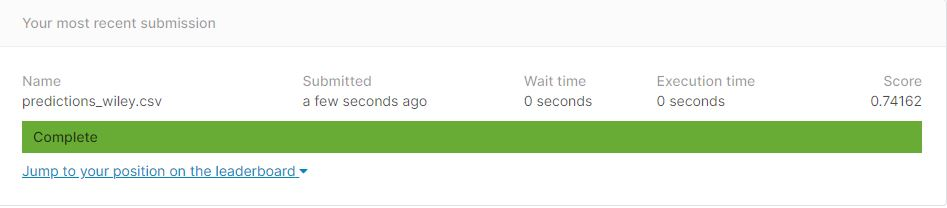

So I am interested if maybe another classifier does better.  I will also submit SVC to Kaggle.

In [66]:
svc_pipe = make_pipeline(StandardScaler(), SVC(C=grid_SVC.best_params_['classifier__C'],
                                               gamma=grid_SVC.best_params_['classifier__gamma'],
                                               random_state=0))


y_pred = svc_pipe.fit(X, y).predict(X_test_pp)

save_preds('predictions_wiley.csv', y_pred, pd.read_csv("datasets/titanic_test.csv"))

!kaggle competitions submit -c titanic -f predictions_wiley.csv -m "Wiley SVC"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 5.48kB/s]


So I posted with SVC and it was a better score actually.  This just proves that just because a classifier performs better on a cross-validation, i.e. RandomForest was 82% and SVC was 81%, does not necessarily mean it will perform better on the test set.

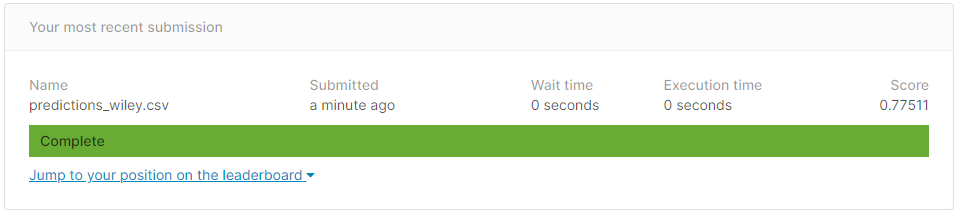